# En este ejercicio de regresión logística, veremos las estadísticas de un videojuego, analizaremos los datos de uno de los equipos y los usaremos para realizar predicciones.

# Celdas 1-2

En estas primeras celdas lo que hacemos es primero montar el drive e importar librerias que nos ayudarán en el transcurso del ejercicio.

In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Celda 3
En esta celda lo que hacemos es cargar el dataset que se utilizará y separarlo en una parte que será utilizada para el entrenamiento (80% de los datos) y otra parte que será utilizada para las pruebas (20% restante de los datos).


In [201]:
data = np.loadtxt('/content/drive/MyDrive/Com300/Datasets_Lab/Challenger_Ranked_Games(Lab3).csv', delimiter=',')

X, y = data[:, :-1], data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}, {y_test.shape}')

Tamaño del conjunto de entrenamiento: (21523, 10), (21523,)
Tamaño del conjunto de prueba: (5381, 10), (5381,)


# Celdas 3-4
En estas celdas se mostrarán los datos en un gráfico. Mostrándonos tal como se ve en la imágen, las estrellas representando que el equipo azul ganó la partida y los puntos representando que perdió.

In [202]:
def plotData(X_train, y_train):

    fig = pyplot.figure()
    pos = y == 1
    neg = y == 0

    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


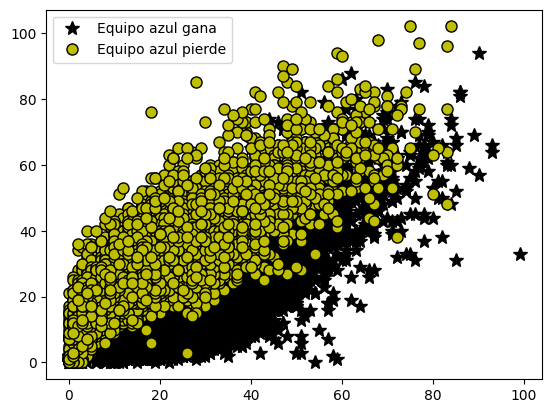

In [203]:
plotData(X_train, y_train)
pyplot.legend(['Equipo azul gana', 'Equipo azul pierde'])
pass

# Celdas 4-5
En estas celdas calculamos la sigmoide evitando problemas de overflow y convirtiendo la entrada a un arreglo numpy.
También configuramos la matriz agregando una columna de unos.

In [204]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    g = 1 / (1 + np.exp(-z))
    return g

    z = [0, 0.5, 1]
    g = sigmoid(z)
print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [ ]:
m, n = X_train.shape
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)

# Celdas 6-7
En estas celdas creamos las funciones para el cálculo del costo y el descenso por el gradiente.

In [205]:
def calcularCosto(theta, X_train, y_train):
    m = len(y_train)
    h = sigmoid(X_train.dot(theta))
    h = np.clip(h, 1e-10, 1 - 1e-10)
    costo = (-1/m) * (y_train.dot(np.log(h)) + (1 - y_train).dot(np.log(1 - h)))
    return costo

In [207]:
def descensoGradiente(theta, X_train, y_train, alpha, num_iters):
    m = len(y_train)
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X_train.dot(theta))
        error = h - y_train
        gradiente = (1/m) * X_train.T.dot(error)
        theta = theta - alpha * gradiente

        J_history.append(calcularCosto(theta, X_train, y_train))

    return theta, J_history

# Celda 8
En la celda 8 escalamos los datos que se utilizarán e iniciamos el descenso por la gradiente. Realizamos también la respectiva gráfica.

Theta final:
[ 1.10573984 -2.24800156  0.746657   -0.26356741  0.01148445 -0.10722403
 -0.25127223  0.78277315 -0.09996666  1.10130887]


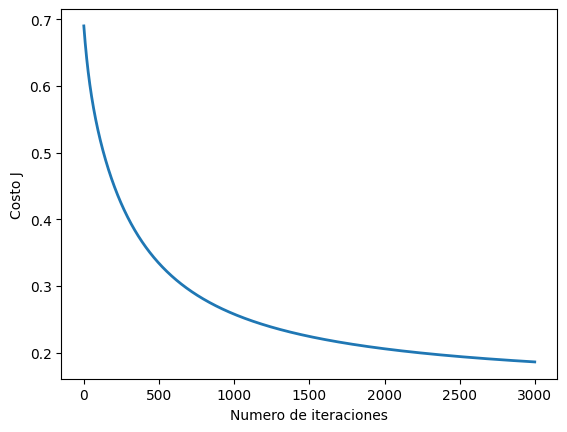

In [208]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

alpha = 0.01
num_iters = 3000

theta = np.zeros(X_train.shape[1])

theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print("Theta final:")
print(theta)

# Celdas 9-10
Realizamos un par de pruebas y vemos los resultados comparando con valores reales del dataset:
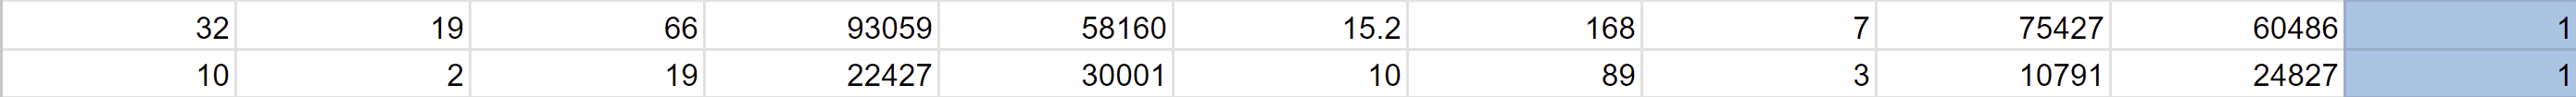

In [214]:
X_array = [32, 19, 66, 93059, 58160, 15.2, 168, 7, 75427, 60486]
y_predicted = sigmoid(np.dot(X_array, theta))

print('El equipo azul con dichas características tiene una probabilidad de ganar de: {:.2f}'.format(y_predicted_value))

El equipo azul con dichas características tiene una probabilidad de ganar de: 1.00


In [215]:
X_array = [10, 2, 19, 22427, 30001, 10.0, 89, 3, 10791, 24827]
y_predicted = sigmoid(np.dot(X_array, theta))

print('El equipo azul con dichas características tiene una probabilidad de ganar de: {:.2f}'.format(y_predicted_value))

El equipo azul con dichas características tiene una probabilidad de ganar de: 1.00


In [221]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    # Transpose theta to align dimensions for dot product
    h = sigmoid(X.dot(theta)) # Removed .T

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [223]:
# Reducir theta a 10 parámetros
theta_reduced = theta[:10]

# Calcular el costo y el gradiente con el theta reducido
cost, grad = costFunction(theta_reduced, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))

Costo en theta inicial (zeros): nan


<ipython-input-221-15c57610fa1b>:11: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


In [225]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([1.2, 0.2, 0.2, 0.5, 0.6, 1.1, 1.2, 1.3, 0.9, 0.8])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[1.2 0.2 0.2 0.5 0.6 1.1 1.2 1.3 0.9 0.8]
Costo en theta prueba: nan
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[9.155, 14.956, 14.812]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


<ipython-input-221-15c57610fa1b>:11: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


In [228]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        theta_reduced,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

<ipython-input-228-3bec40309a31>:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,
<ipython-input-221-15c57610fa1b>:11: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


Costo con un valor de theta encontrado por optimize.minimize: nan
Costo esperado (aproximado): 0.203

theta:
	[1.106, -2.248, 0.747]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


In [ ]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

    Parametros:
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Data set de entrada. Se supone que X es una de las siguientes:
            1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
            2) Matriz MxN, N> 3, donde la primera columna son todos unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


[ 28.05882245 101.8278578 ]
[96.16598096 20.65402814]


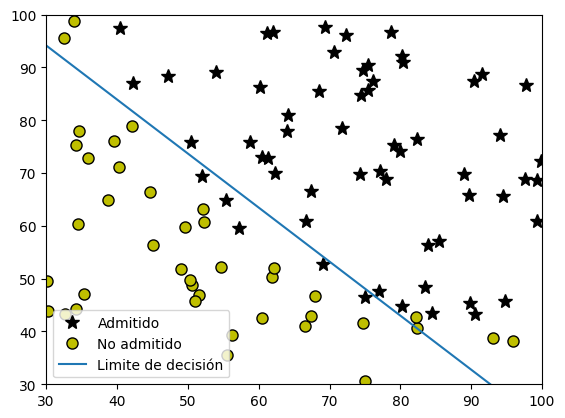

In [ ]:
# Graficar limites
plotDecisionBoundary(plotData, theta, X, y)

In [ ]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [ ]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 45, 85], theta))
print('Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: 0.776%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 89.00 %
Precisión esperada (aproximadamente): 89.00 %
